<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab44_opencv_intro_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# opencv
## 제공하는 기능
- 이미지 형식 변환
- 크기 및 색상 변환
- 필터링, 얼굴 인식, 물체 인식, 문자 인식

In [ ]:
# !pip install opencv-python    # already installed

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# 이미지 읽기
!curl -L https://www.dropbox.com/s/v4225z25x0zz4y3/pool.jpg -o pool.jpg
img_cv = cv2.imread("pool.jpg")  # opencv 에서는 BGR 순서로 기록

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1587k  100 1587k    0     0   963k      0  0:00:01  0:00:01 --:--:-- 9249k


In [ ]:
type(img_cv)

numpy.ndarray

In [ ]:
img_cv[0]

array([[ 87,  86,  76],
       [ 87,  86,  76],
       [ 88,  88,  76],
       ...,
       [255, 254, 253],
       [255, 254, 253],
       [255, 254, 253]], dtype=uint8)

In [ ]:
img_cv.shape, img_cv.min(), img_cv.max()

((3024, 4032, 3), 0, 255)

## 이미지를 그림으로 출력하기

### cv2.cvtColor():
- The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). 
- Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

- The conventional ranges for R, G, and B channel values are:

  - 0 to 255 for CV_8U images
  - 0 to 65535 for CV_16U images
  - 0 to 1 for CV_32F images

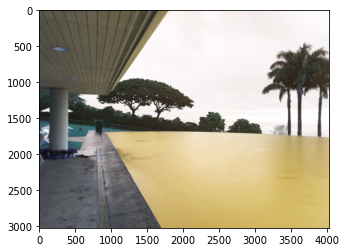

In [ ]:
plt.imshow(img_cv)   # order: BGR

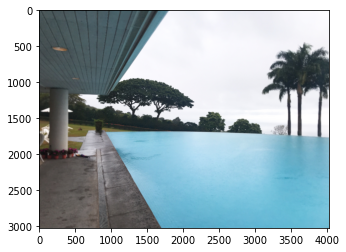

In [ ]:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
# plt.axis("off")
plt.show()

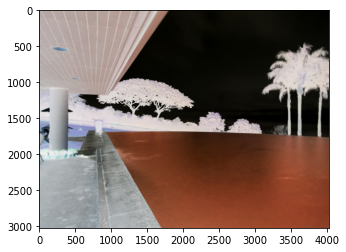

In [ ]:
# 반전(네거티브) 처리
img2 = 255 - img_cv
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

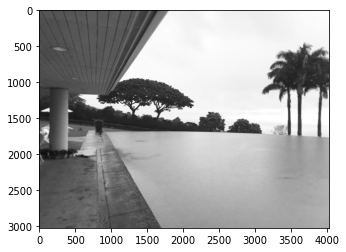

In [ ]:
# 그레이로 변환
img2 = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

In [ ]:
# dir(cv2)

In [ ]:
j=[]
for i in dir(cv2):
    if i.startswith('COLOR_'):
        j.append(i)
        
j[:3]

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']

In [ ]:
[i for i in dir(cv2) if i.startswith('COLOR_')][:3]    # same as the above

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']

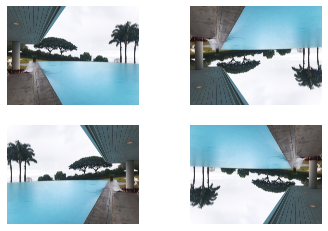

In [ ]:
# 영상의 반전 (x-axis, y-axis, both axes)
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img_cv,0), cv2.COLOR_BGR2RGB)) # flip around x-axis
plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img_cv,1), cv2.COLOR_BGR2RGB)) # flip arund y_axis
plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img_cv,-1), cv2.COLOR_BGR2RGB)) # flip around both axis


## 저장하기

In [ ]:
cv2.imwrite("pool_2.jpg", img_cv)

True

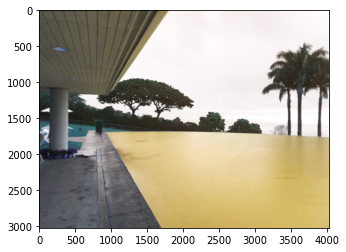

In [ ]:
img2 = cv2.imread("pool_2.jpg")
plt.imshow(img2) 

## 크기 자르기

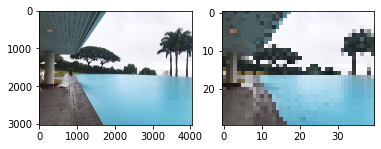

In [ ]:
# 해상도 조정
img2 = cv2.resize(img_cv, (40, 30))

plt.subplot(1,2,1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
# plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

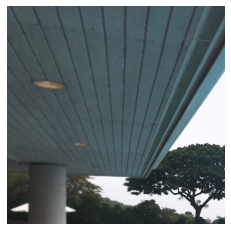

In [ ]:
# 폭과 높이 조정
img2 = img_cv[0:1500, 0:1500]
# im2 = cv2.resize(img, (600, 300))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# 얼굴을 검출하는 기능
- Haar-like 특징 학습기 사용한다. 눈, 코, 입 부분의 명암의 패턴을 인식
- 얼굴 특징 데이터베이스인 캐스케이드 파일 필요 (haarcascade 검색하면 됨
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- 여기서는 정면 얼굴 인식만 실습한다.

### Haar-cascade Detection in OpenCV
- OpenCV comes with a trainer as well as detector. If you want to train your own 
classifier for any object like car, planes etc. you can use OpenCV to create one. 
Its full details are given here: Cascade Classifier Training (https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html)
- Here we will deal with detection. OpenCV already contains many pre-trained 
classifiers for face, eyes, smiles, etc. Those XML files are stored in 
the opencv/data/haarcascades/ folder. 

In [ ]:
# 얼굴 패턴 정보 download
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \
    -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   170  100   170    0     0    871      0 --:--:-- --:--:-- --:--:--   871
100  660k  100  660k    0     0  1984k      0 --:--:-- --:--:-- --:--:-- 1984k


- XML(extensible markup language): HTML is used to display data and focuses on how data looks. XML is a software and hardware independent tool used to transport and store data. It focuses on what data is.

In [ ]:
# 이미지를 읽어 들이고 그레이스케일로 변환
# https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1733k  100 1733k    0     0  1117k      0  0:00:01  0:00:01 --:--:-- 7502k


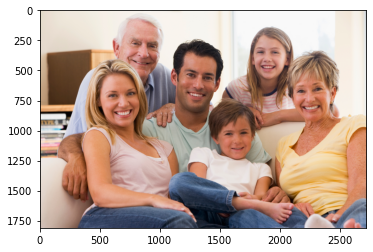

In [ ]:
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img.shape

(1810, 2716, 3)

In [ ]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)
# 얼굴 인식하기
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

얼굴의 좌표 = 676 144 381 381
얼굴의 좌표 = 1736 231 313 313
얼굴의 좌표 = 1126 393 401 401
얼굴의 좌표 = 2065 535 352 352
얼굴의 좌표 = 482 551 396 396
얼굴의 좌표 = 1472 906 322 322


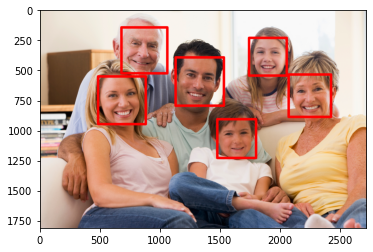

In [ ]:
# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
face_list

array([[ 676,  144,  381,  381],
       [1736,  231,  313,  313],
       [1126,  393,  401,  401],
       [2065,  535,  352,  352],
       [ 482,  551,  396,  396],
       [1472,  906,  322,  322]], dtype=int32)

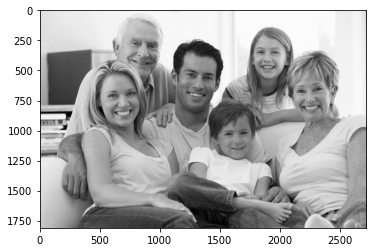

In [ ]:
# 이미지를 흑백으로 바꾸고 얼굴을 모자이크 처리를 해 보자
# slice = img_gray[x:x+w, y:y+h]
slice = img_gray[y:y+h, x:x+w]    # 어레이 순서는 y-x 순서 주의
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap='gray')
plt.show()

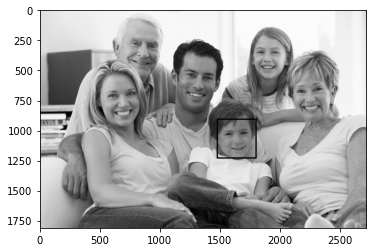

In [ ]:
cv2.rectangle(img_gray, (x, y), (x+w, y+h), red, thickness=10)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [ ]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

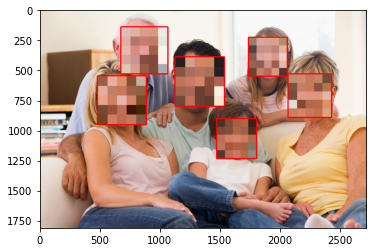

In [ ]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 5)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()